# Working sheet
## 03 - Simple logistic regression with R
V03.01.00 - 2024-02-17

## Load data
Change the path and the file name in the following box.

In [21]:
library(readr)
df <- read_csv("data/PID2.csv",
                 show_col_types = FALSE)
df$diabetes_n <- ifelse(PID2$diabetes == "neg", 0, 1)


Look at the structure and the head of the dataset.

In [22]:
str(df)

spc_tbl_ [392 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ pregnant  : num [1:392] 1 0 3 2 1 5 0 1 1 3 ...
 $ glucose   : num [1:392] 89 137 78 197 189 166 118 103 115 126 ...
 $ pressure  : num [1:392] 66 40 50 70 60 72 84 30 70 88 ...
 $ triceps   : num [1:392] 23 35 32 45 23 19 47 38 30 41 ...
 $ insulin   : num [1:392] 94 168 88 543 846 175 230 83 96 235 ...
 $ mass      : num [1:392] 28.1 43.1 31 30.5 30.1 25.8 45.8 43.3 34.6 39.3 ...
 $ pedigree  : num [1:392] 0.167 2.288 0.248 0.158 0.398 ...
 $ age       : num [1:392] 21 33 26 53 59 51 31 33 32 27 ...
 $ diabetes  : chr [1:392] "neg" "pos" "pos" "pos" ...
 $ diabetes_n: num [1:392] 0 1 1 1 1 1 1 0 1 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   pregnant = col_double(),
  ..   glucose = col_double(),
  ..   pressure = col_double(),
  ..   triceps = col_double(),
  ..   insulin = col_double(),
  ..   mass = col_double(),
  ..   pedigree = col_double(),
  ..   age = col_double(),
  ..   diabetes = col_character()
  .. )
 - attr(

In [23]:
head(df)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes,diabetes_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,89,66,23,94,28.1,0.167,21,neg,0
0,137,40,35,168,43.1,2.288,33,pos,1
3,78,50,32,88,31.0,0.248,26,pos,1
2,197,70,45,543,30.5,0.158,53,pos,1
1,189,60,23,846,30.1,0.398,59,pos,1
5,166,72,19,175,25.8,0.587,51,pos,1


Look at frequencies and descriptive statistics.

The summary() function is the first approach.

describe() from the Hmisc package is an alternative.

In [24]:
summary(df)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 56.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.:21.00  
 Median : 2.000   Median :119.0   Median : 70.00   Median :29.00  
 Mean   : 3.301   Mean   :122.6   Mean   : 70.66   Mean   :29.15  
 3rd Qu.: 5.000   3rd Qu.:143.0   3rd Qu.: 78.00   3rd Qu.:37.00  
 Max.   :17.000   Max.   :198.0   Max.   :110.00   Max.   :63.00  
    insulin            mass          pedigree           age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0850   Min.   :21.00  
 1st Qu.: 76.75   1st Qu.:28.40   1st Qu.:0.2697   1st Qu.:23.00  
 Median :125.50   Median :33.20   Median :0.4495   Median :27.00  
 Mean   :156.06   Mean   :33.09   Mean   :0.5230   Mean   :30.86  
 3rd Qu.:190.00   3rd Qu.:37.10   3rd Qu.:0.6870   3rd Qu.:36.00  
 Max.   :846.00   Max.   :67.10   Max.   :2.4200   Max.   :81.00  
   diabetes           diabetes_n    
 Length:392         Min. 

In [25]:
library(Hmisc)
describe(df)

df 

 10  Variables      392  Observations
--------------------------------------------------------------------------------
pregnant 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     392        0       17    0.977    3.301    3.363        0        0 
     .25      .50      .75      .90      .95 
       1        2        5        8       10 
                                                                            
Value       0.00  0.85  1.87  2.89  3.91  4.93  5.95  6.97  7.99  8.84  9.86
Frequency     56    93    64    45    27    21    19    20    14    11     6
Proportion 0.143 0.237 0.163 0.115 0.069 0.054 0.048 0.051 0.036 0.028 0.015
                                              
Value      10.88 11.90 12.92 13.94 14.96 17.00
Frequency      5     5     3     1     1     1
Proportion 0.013 0.013 0.008 0.003 0.003 0.003

For the frequency table, variable is rounded to the nearest 0.17
------------------------------------------------------------------

Plot the variables of interest with a scatter plot.

Either as single plots as in the following plot.

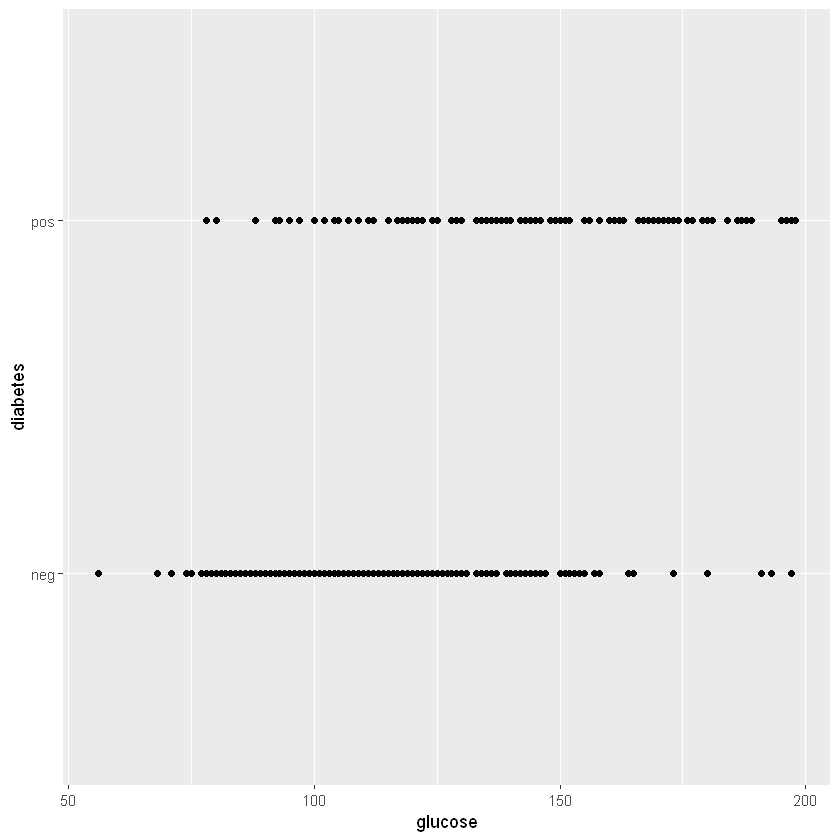

In [26]:
library(ggplot2)
ggplot(df, aes(x = glucose, y = diabetes)) +
  geom_point()

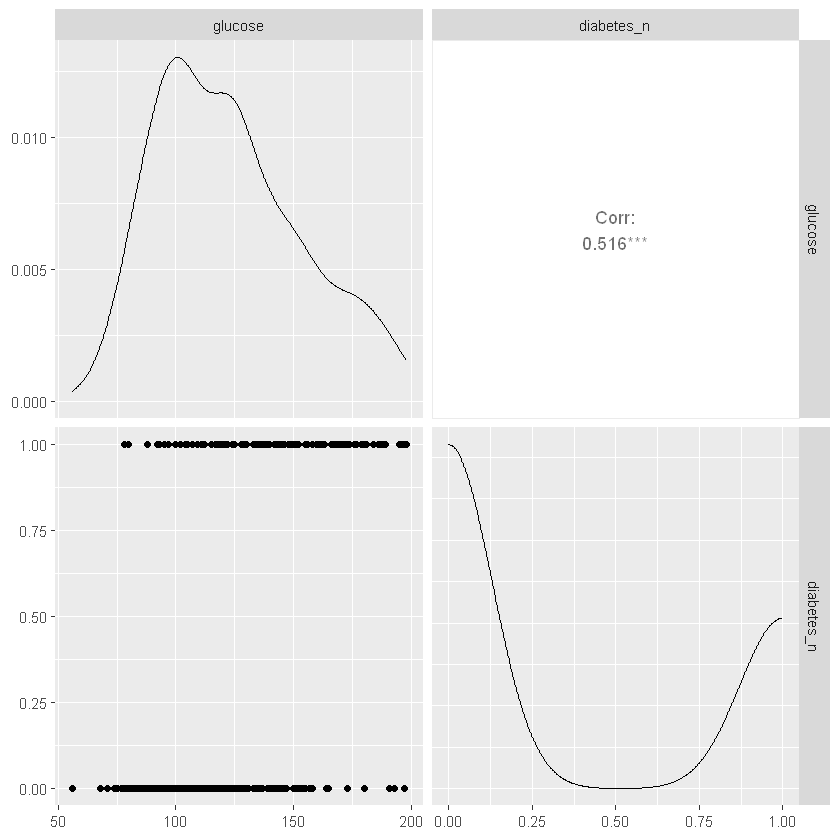

In [27]:
library(GGally)
library(tidyverse)
ggpairs(df %>% select(glucose, diabetes_n))

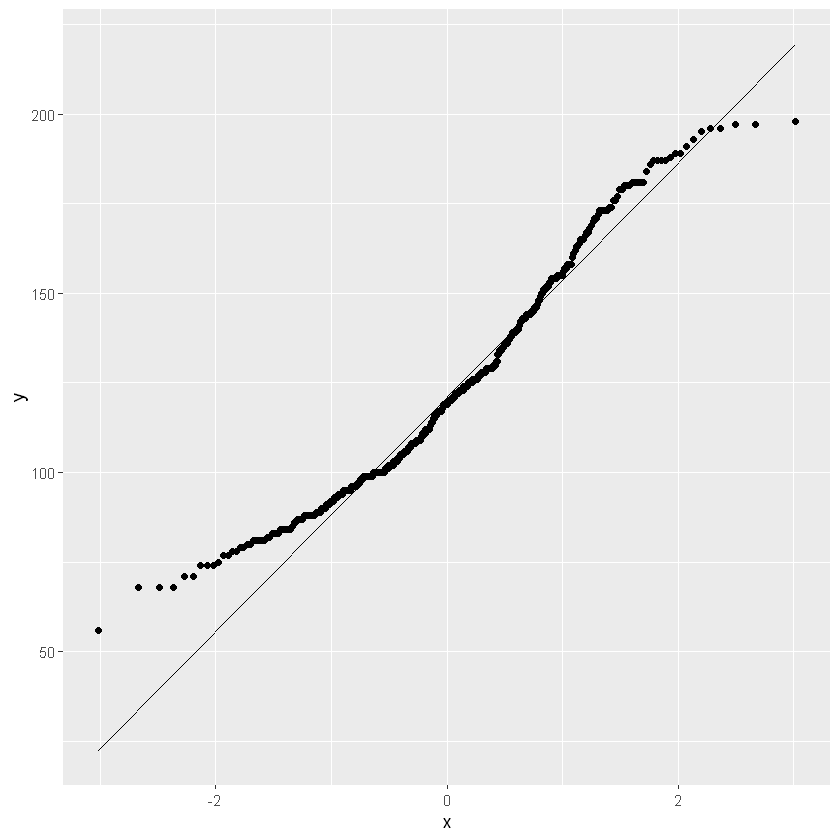

In [28]:
ggplot(df, aes(sample = glucose)) + 
  geom_qq() +
  geom_qq_line()

## Assumptions for logistic regression

- The dependent variable is nominally scaled with exactly two values (dichotomous).
- The independent variable is either nominally scaled or at least interval scaled.
- Independence of observations.
- We need at least a certain number of cases per predictor. As with many other regressions, binomial logistic regression results improve as the sample size increases.
- There should be no outliers in the data.
- Linearity. There must be a linear relationship between the continuous independent variables and the logit transformation of the dependent variable.
- No multicolinearity.


The dependent variable is nominally scaled with exactly two values (dichotomous).

In [29]:
table(df$diabetes)
table(df$diabetes_n)


neg pos 
262 130 


  0   1 
262 130 

In [30]:
library(broom) 
my_logistic <- glm(diabetes_n ~ glucose, data = PID2, family = binomial)

summary(my_logistic)



Call:
glm(formula = diabetes_n ~ glucose, family = binomial, data = PID2)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.095521   0.629787  -9.679   <2e-16 ***
glucose      0.042421   0.004761   8.911   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 386.67  on 390  degrees of freedom
AIC: 390.67

Number of Fisher Scoring iterations: 4


In [31]:
glance(my_logistic)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
498.0978,391,-193.333,390.666,398.6085,386.666,390,392


In [32]:
my_logistic_intercept <- glm(diabetes_n ~ 1, data = PID2, family = binomial)
glance(my_logistic_intercept)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
498.0978,391,-249.0489,500.0978,504.0691,498.0978,391,392


In [33]:
# z-test
# Wald’s chi-squared statistic for the hypothesis that the coefficient of glucose
# is zero, or equivalently that the odds-ratio is one
m0 <- glm(diabetes_n ~ 1, data = PID2, family = binomial)
m1 <- glm(diabetes_n ~ glucose, data = PID2, family = binomial)

b <- coef(m1)
se <- sqrt(diag(vcov(m1)))
(b[2]/se[2])^2

# likeli ratio test
#-2*(logLik(m0) - logLik(m1))
-2*(logLik(m0) - logLik(m1))


glucose 
79.40245

'log Lik.' 111.4318 (df=1)

In [34]:
tidy(my_logistic)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-6.09552139,0.629787038,-9.678703,3.713993e-22
glucose,0.04242099,0.004760623,8.910805,5.066328e-19


In [35]:
summary(my_logistic)


Call:
glm(formula = diabetes_n ~ glucose, family = binomial, data = PID2)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.095521   0.629787  -9.679   <2e-16 ***
glucose      0.042421   0.004761   8.911   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 498.10  on 391  degrees of freedom
Residual deviance: 386.67  on 390  degrees of freedom
AIC: 390.67

Number of Fisher Scoring iterations: 4


In [36]:
exp(my_logistic$coeff)
suppressMessages(exp(confint(my_logistic)))

(Intercept)     glucose 
0.002252935 1.043333616

,2.5 %,97.5 %
(Intercept),0.0006194309,0.007358113
glucose,1.0340267589,1.053554337


In [37]:
library(survival)
concordance(my_logistic)

Call:
concordance.lm(object = my_logistic)

n= 392 
Concordance= 0.8058 se= 0.02356
concordant discordant     tied.x     tied.y    tied.xy 
     27332       6503        225      42049        527 

In [38]:
# Sommer's D is 2C-1
2 * 0.8058 - 1
# Goodman and Kruskal's Gamma (or simple Gamma)
# (#concordant - #discordant) / (#concordant + #discordant)
(27332 - 6503) / (27332 + 6503)
# https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient 
# Tau
# 1 - 2*(number of discordant pairs) / (number of pairs)
# 1 - 2 * 6503 / (n * (n - 1) / 2)
392 * 391 / 2
1 - 2 * 6503 / (392 * (392 - 1) / 2)
# Tau a
# (#concordant - # discordant) / n
(27332 - 6503) / (392*391 / 2)
# Tau c below, but what is c?
# 2 * (nc - nd) / (n^2*(m-1)/m)
2 * (27332 - 6503) / (392**2 * (2 - 1) / 2)

[1] 0.6116

[1] 0.6156051

[1] 76636

[1] 0.8302886

[1] 0.2717913

[1] 0.542196

The others could be calculated by hand according to the formula mentioned in the previous block 8.

In [39]:
library(yardstick)
obs <- as.integer(df$diabetes_n)
pred <- as.integer(round(predict(my_logistic, type = "response")))
str(obs)
str(pred)
df1 <- table(obs, pred)

 int [1:392] 0 1 1 1 1 1 1 0 1 0 ...
 int [1:392] 0 0 0 1 1 1 0 0 0 0 ...


In [40]:
cf <- conf_mat(df1, truth = obs, estimate = pred)
summary(cf)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7678571
kap,binary,0.4405621
sens,binary,0.7898305
spec,binary,0.7010309
ppv,binary,0.8893130
npv,binary,0.5230769
mcc,binary,0.4499181
j_index,binary,0.4908614
bal_accuracy,binary,0.7454307
